<a href="https://colab.research.google.com/github/hermannKonyar/Breast-Cancer-Machine-Learning-Project/blob/main/Breast_Cancer_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install catboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
df = pd.read_csv('/content/drive/MyDrive/Colab Arşiv/breast-cancer.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [81]:
label_encoder=LabelEncoder()
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=label_encoder.fit_transform(df[i])


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [83]:
df.drop(['id'],axis=1,inplace=True)

In [84]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
y=df['diagnosis']
X=df.iloc[:,1:]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [87]:
models = {
    "Logistic": LogisticRegression(),
    "rfClassifier": RandomForestClassifier(),
    "tree": DecisionTreeClassifier(max_depth = 5, criterion = "gini"),
    "knClassifier": KNeighborsClassifier(n_neighbors = 5),
    "gBoost": GradientBoostingClassifier(),
    "Ada Boost": AdaBoostClassifier(n_estimators = 150),
    "Bagging": BaggingClassifier(n_estimators = 150),
    "xgBoost": XGBClassifier(),
    "catBoost": CatBoostClassifier(logging_level = "Silent"),
    "MLP Classifier":MLPClassifier(),
    "lightGBM": LGBMClassifier(),
    "svm": SVC(),
}

In [88]:
accuracy_scores = []
predicted = []

for i in models:
    models[i].fit(X_train, y_train)
    y_pred = models[i].predict(X_test)
    accuracy_scores.append(int(accuracy_score(y_pred, y_test) * 100))
    predicted.append(y_pred)

for j, k in zip(accuracy_scores, models):
    print (' ', k, ' accuracy : ', j, ' %  ')

  Logistic  accuracy :  96  %  
  rfClassifier  accuracy :  96  %  
  tree  accuracy :  93  %  
  knClassifier  accuracy :  95  %  
  gBoost  accuracy :  95  %  
  Ada Boost  accuracy :  97  %  
  Bagging  accuracy :  95  %  
  xgBoost  accuracy :  96  %  
  catBoost  accuracy :  97  %  
  MLP Classifier  accuracy :  94  %  
  lightGBM  accuracy :  97  %  
  svm  accuracy :  94  %  


Ada Boost  :  97  %


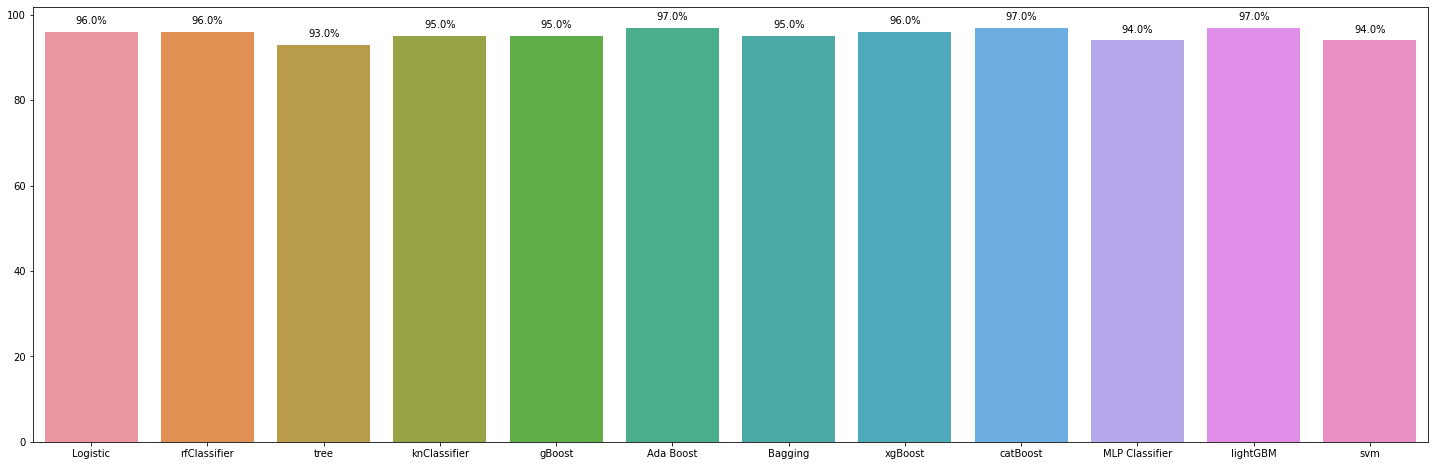

In [89]:
plt.figure(figsize = (25, 8))
ax = sns.barplot(x = list(models.keys()), y = accuracy_scores)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')

print (list(models.keys())[accuracy_scores.index(max(accuracy_scores))], " : " ,max(accuracy_scores), " %")